In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import missingno as msno

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = train.copy()
test_df = test.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

 ### A SHORT DESCRIPTION OF THE FEATURES.


datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals




HERE ALL THE VARIABLES OR FEATURES ARE NUMERIC AND THE TARGET VARIABLE THAT WE HAVE TO PREDICT IS THE count VARIABLE. HENCE THIS IS A TYPICAL EXAMPLE OF A REGRESSION PROBLEM AS THE count VARIABLE IS CONTINUOUS VARIED.

In [6]:
# No missing value
# Visualizing data.....

In [7]:
df['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

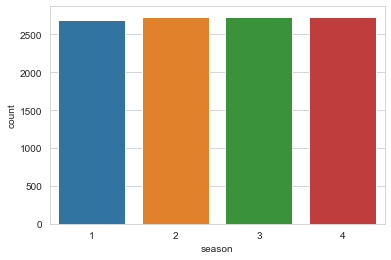

In [8]:
#plt.figure(figsize=(10,5))
sns.countplot(x='season',data = df)
plt.show()                       # No effect of season                        

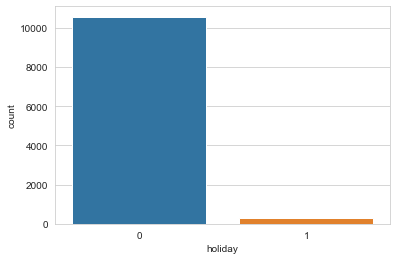

In [9]:
sns.countplot(x='holiday',data = df)
plt.show()

In [10]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [11]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

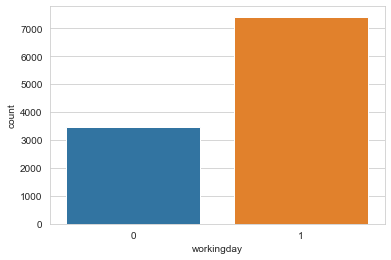

In [12]:
sns.countplot(x='workingday',data = df)
plt.show()

In [13]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

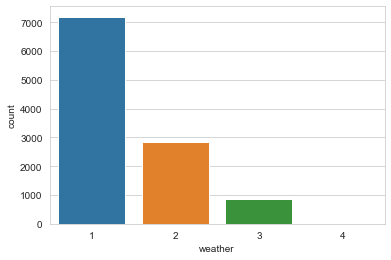

In [14]:
sns.countplot(x='weather',data = df)
plt.show()

In [15]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


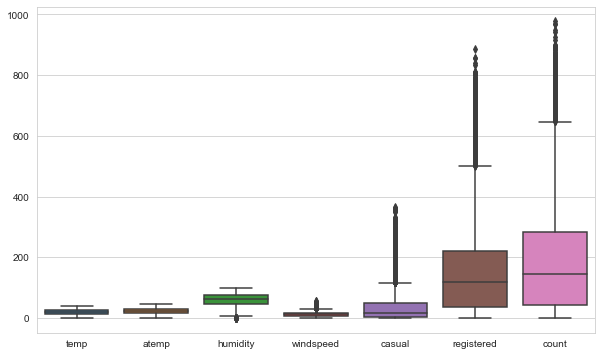

In [16]:
plt.figure(figsize=(10,6)) 
sns.boxplot(data=df[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
plt.show()

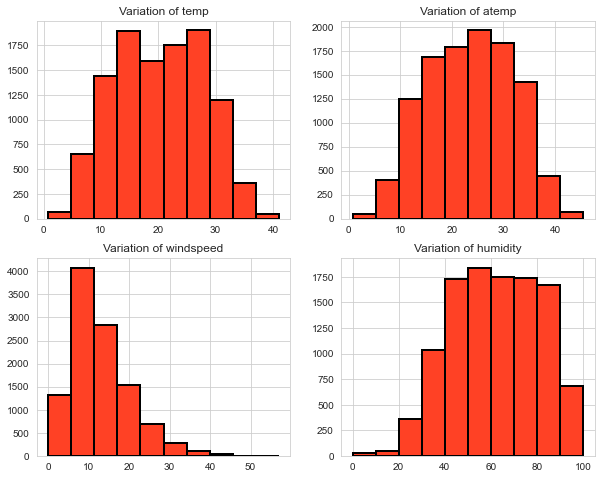

In [17]:
# can also be visulaized using histograms for all the continuous variables.
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,8)
plt.show()

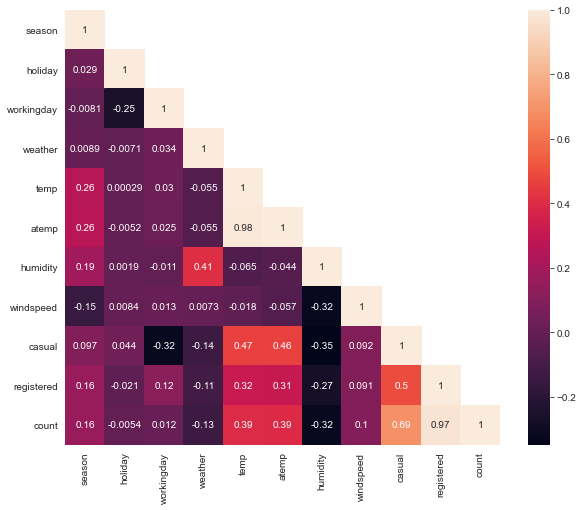

In [18]:
corr_mat = df[:].corr()
plt.figure(figsize=(10,8))
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(data = corr_mat,mask = mask,square = True,annot=True)
plt.show()

In [19]:
# feature engg

In [20]:
# # seperating season as per values. this is bcoz this will enhance features.
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [21]:
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [22]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)

In [23]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})

In [24]:
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = test_df['year'].map({2011:0, 2012:1})
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,day,month,year,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,...,0,0,1,0,0,0,3,1,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,0,0,1,0,0,0,3,1,0,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,0,0,1,0,0,0,3,1,0,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,...,0,0,1,0,0,0,3,1,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,...,0,0,1,0,0,0,3,1,0,4


In [25]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,1,0,0,0,4,5,1,0


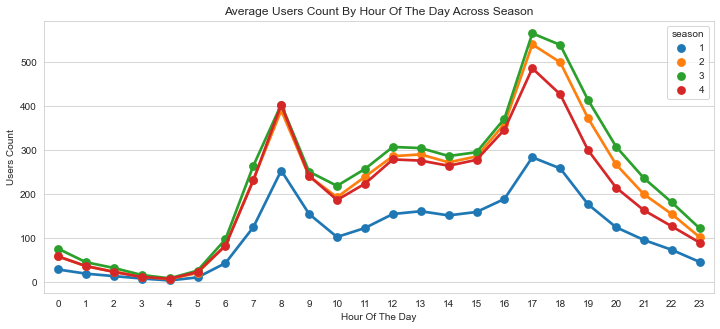

In [26]:
hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(12,5))
ax = sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')
plt.show()

### (For Above Fig) season : 1 = spring, 2 = summer, 3 = fall, 4 = winter

In [27]:
day_names = {1:"Tuesday" ,2:"Wednesday",3:"Thursday",4: "Friday",5:"Saturday",6:"Sunday",7:"Monday"}
day_names

{1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday',
 7: 'Monday'}

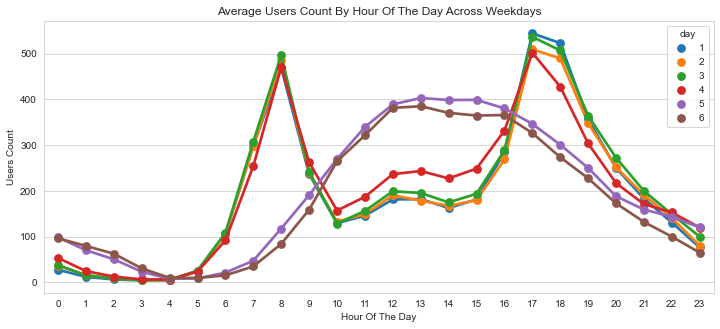

In [28]:
hueOrder = [1,2,3,4,5,6]
plt.figure(figsize=(12,5))
hourAggregated = pd.DataFrame(df.groupby(["hour","day"],sort=True)["count"].mean()).reset_index()
g = sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["day"],hue_order = hueOrder, data=hourAggregated, join=True)
g.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

plt.show()

### (For Above fig) 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday', 7: 'Monday'

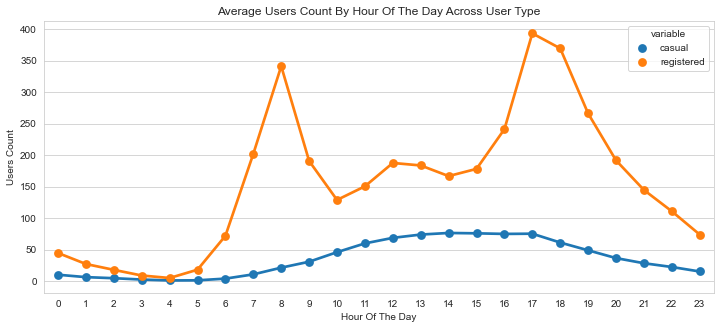

In [29]:
hourTransformed = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
plt.figure(figsize=(12,5))
ax = sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

plt.show()

In [30]:
df.drop(['casual','registered'],axis=1,inplace=True)
df.drop(['season','weather'],inplace=True,axis=1)

test_df.drop(['season','weather'],inplace=True,axis=1)

In [31]:
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


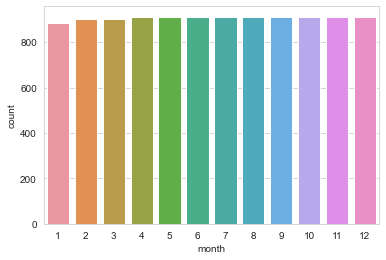

In [32]:
sns.countplot(x='month',data = df)
plt.show()

In [33]:
# No great variation through months

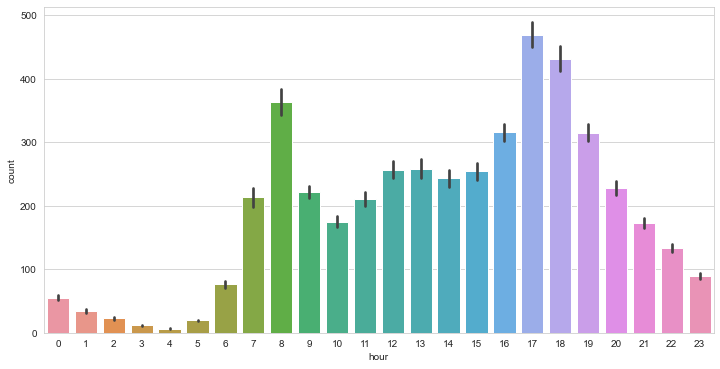

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='hour',y='count',data = df)
plt.show()

In [35]:
# More demand in office and school in and out time

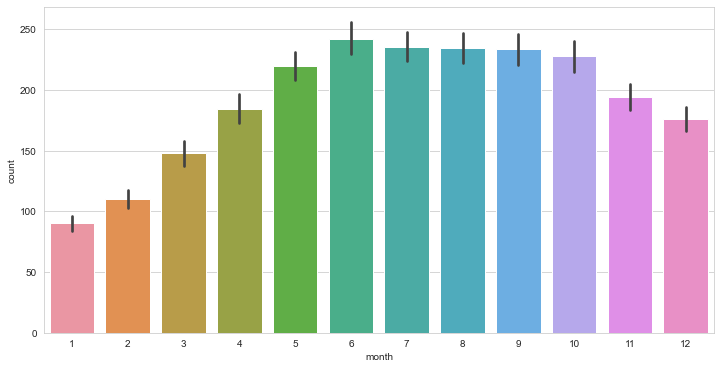

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count',data=df)
plt.show()
# note that month affects season and that effects wheteher people take bike or not. like climate conditions rainy,hazy etc... 

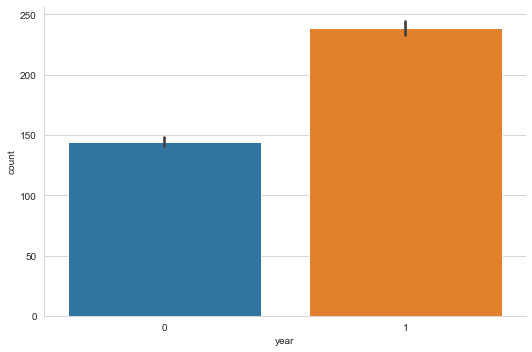

In [37]:
sns.factorplot(x="year",y="count",data=df,kind='bar',size=5,aspect=1.5)
plt.show()
# 0 for 2011 and 1 for 2012. Hence demand has increased over the years.

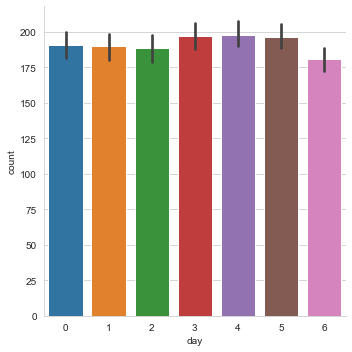

In [38]:
sns.factorplot(x="day",y='count',kind='bar',data=df,size=5,aspect=1)
plt.show()

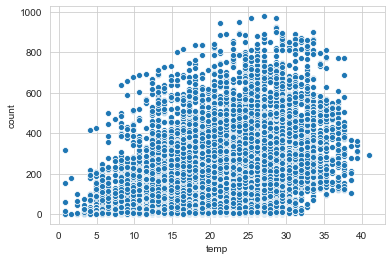

In [39]:
sns.scatterplot(x="temp",y="count",data=df)#,color='#ff4125')
plt.show()

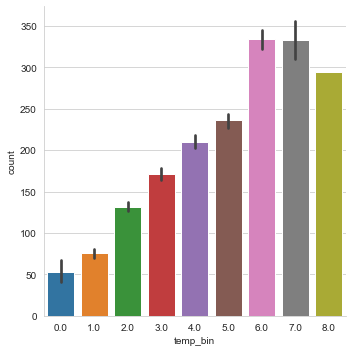

In [40]:
new_df=df.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
# now we can visualize as follows
sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')
plt.show()

In [41]:
#now the demand is highest for bins 6 and 7 which is about tempearure 30-35(bin 6) and 35-40 (bin 7).

In [42]:
df.drop('datetime',axis=1,inplace=True)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [44]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=57)

In [45]:
models=[LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['LinearRegression','RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmse=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSE':rmse}   
d

{'Modelling Algo': ['LinearRegression',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSE': [140.1255413752454,
  40.915603081787886,
  102.54152519223204,
  42.82298119689091,
  155.84832848980983,
  114.67555971985043]}

In [46]:
rmse_frame=pd.DataFrame(d)
rmse_frame

,Modelling Algo,RMSE
0,LinearRegression,140.125541
1,RandomForestRegressor,40.915603
2,AdaBoostRegressor,102.541525
3,BaggingRegressor,42.822981
4,SVR,155.848328
5,KNeighborsRegressor,114.675560


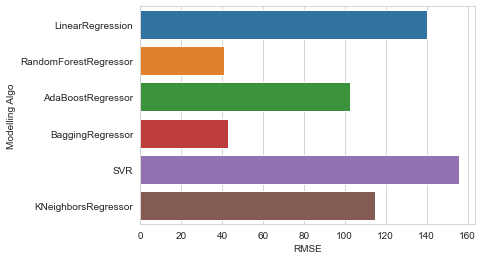

In [47]:
sns.barplot(x='RMSE',y='Modelling Algo',data = rmse_frame)
plt.show()

In [48]:
# Since RF has good rmse so lets tune this model

In [49]:
no_of_test=[300,400,500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict)
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print("RMSE is:",(np.sqrt(mean_squared_error(pred,y_test))))

RMSE is: 40.82673650714463


In [50]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 300, 'n_jobs': -1}

In [51]:
model=RandomForestRegressor()
clf=model
clf.fit(x_train,y_train)
test_pred=clf.predict(x_test)
print("RMSE is:",np.sqrt(mean_squared_error(test_pred,y_test)))

RMSE is: 40.4322790719121


In [52]:
# for KNN
n_neighbors=[]
for i in range (0,20):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_error')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_error(pred,y_test))))

114.67555971985043


In [53]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 5}

In [54]:
pred=clf_rf.predict(test_df.drop('datetime',axis=1))
d={'datetime':test['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.head()

,datetime,count
0,2011-01-20 00:00:00,2.890000
1,2011-01-20 01:00:00,3.833333
2,2011-01-20 02:00:00,3.833333
3,2011-01-20 03:00:00,3.710000
4,2011-01-20 04:00:00,3.710000
